# Data Analysis using Machine Learning

This project consists in the analysis of dataset, through the use of machine learning algorithms, using Python as a programming language. This Jupyter Notebook is organized into sections, which include the steps of the analysis performed and explain very succinctly the procedures performed and decisions taken during the analysis.

## Table of contents

1. [Introduction](#chapter1)
    1. [About Us](#section1_1)
    2. [Data Selection and Context of this Project](#section1_2)
    3. [Credits](#section1_3)
2. [Initial Data Exploration and Preprocessing](#chapter2)
    1. [Importing Packages](#section2_1)
    2. [Importing datasets](#section2_2)
    3. [Exploring the data](#section2_3)
    4. [Protein Descriptors](#section2_4)
    5. [Preprocessing](#section2_5)
3. [Non-Supervised Analysis](#chapter3)
    1. [PCA](#section3_1)
    2. [Kmeans](#section3_2)
    3. [tSNE](#section3_3)
4. [Machine Learning](#chapter4)
    1. [Regression Analysis](#section4_1)
    2. [Binary Analysis](#section4_2)
5. [Deep Learning ](#chapter5)
6. [Conclusions](#chapter6)

<a class="anchor" id="chapter1"></a>

## 1. Introduction

<a class="anchor" id="section1_1"></a>

### 1.1 About Us

This project is part of the subject `Sistemas Inteligentes para a Bioinformática` in the Master in Bioinformatics (University of Minho - 2022/2023).

This project was developed by the following elements:
- Alexandre Miguel Magalhães Esperança - pg45963
- André Filipe Pereira da Silva - pg45462
- Mónica Rafaela Machado Leiras - pg45473

<a class="anchor" id="section1_2"></a>

### 1.2 Data Selection and Context of this Project

For the execution of this project, the dataset of the "Novozymes Enzyme Stability Prediction" Competition on the Kaggle platform was selected. You can view the [Competition and Corresponding Data here](https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/data).

The main goal of this competition is to predict the thermostability of enzyme variants. The experimentally measured thermostability (melting temperature) data includes natural sequences, as well as engineered sequences with single or multiple mutations upon the natural sequences.

The test dataset contains experimental melting temperatures of over 2,413 single mutation variants of an enzyme (GenBank: KOC15878.1), obtained by Novozymes A/S. The wild-type amino acid sequence is:

    VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK

For this competition several files were given for the development of this work:

- `train.csv` - the training data, with columns as follows:
  - `seq_id`: unique identifier of each protein variants
  - `protein_sequence`: amino acid sequence of each protein variant. The stability (as measured by tm) of protein is determined by its protein sequence.
  - `pH`: the scale used to specify the acidity of an aqueous solution under which the stability of protein was measured. Stability of the same protein can change at different pH levels.
  - `data_source`: source where the data was published
  - `tm`: target column. Since only the spearman correlation will be used for the evaluation, the correct prediction of the relative order is more important than the absolute tm values. (Higher tm means the protein variant is more stable.)
- `train_updates_20220929.csv` - correction file for train dataset, where some rows have the values ​​of `pH` and `tm` switched, in addition to identifying lines with NaN values. For more details, you can check the [original explanation here](https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/356251)

- `test.csv` - the test data; your task is to predict the target tm for each protein_sequence (indicated by a unique seq_id)

- `sample_submission.csv` - a sample submission file in the correct format, with seq_id values corresponding to test.csv

- `wildtype_structure_prediction_af2.pdb` - the 3 dimensional structure of the enzyme listed above, as predicted by AlphaFold


<a class="anchor" id="section1_3"></a>

### 1.3 Credits

To execute this project, we found some useful code and/or ideas on the forum of the competition. So, we would like to credit the following people with the corresponding notebooks:

[Luca Olga Sharp](https://www.kaggle.com/code/olgashevtsova/enzimes-stability-search-for-the-best-model)

[Alexander Chervov](https://www.kaggle.com/code/alexandervc/novozymes-eda1-ordinalencvisualizationscorrrelat)

[Chris Deotte](https://www.kaggle.com/code/cdeotte/train-data-contains-mutations-like-test-data)

<a class="anchor" id="chapter2"></a>

## 2. Initial Data Exploration and Preprocessing

This step corresponds to the following objectives:
- description and characterization of the assigned data according to the existing documentation/literature;
- brief description of the characteristics of the data available from the initial exploratory analysis;
- description of data preparation and pre-processing steps;
- initial exploratory graphs that illustrate the main characteristics of the data.

<a class="anchor" id="section2_1"></a>

### 2.1 Importing Required Packages


In [5]:
pip install sgt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
pip install propy3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.3/290.3 KB 20.0 MB/s eta 0:00:00


In [7]:
pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 53.3 MB/s eta 0:00:00


In [8]:
pip install pandarallel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pandarallel: filename=pandarallel-1.6.4-py3-none-any.whl size=16678 sha256=d064708b23f8498b2d7eac4af6e8ec463039dff2a8f99568ccb43a5abee5bb37
  Stored in directory: /root/.cache/pip/wheels/62/1e/e7/f9ee096e5cc02890a6934a5670ff6e45a3400f330605bd8210
Successfully built pandarallel


In [ ]:
# pip install nbconvert

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.insert(0,'/content/drive/My Drive/ColabNotebooks/SIB_G4')

In [3]:
%cd /content/drive/My Drive/Colab Notebooks/SIB_G4

/content/drive/My Drive/Colab Notebooks/SIB_G4


In [74]:
#Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import propy
from propy import *
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.manifold import TSNE
from sgt import SGT
from keras import metrics
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Input, Dense, Embedding, Dropout, Conv1D, MaxPooling1D, Flatten, LSTM, concatenate, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from copy import deepcopy
from file_func import *
from models import SupervisedModelOptimization

<a class="anchor" id="section2_2"></a>

### 2.2 Importing datasets

In [10]:
#Train dataframe
train = pd.read_csv("train.csv",index_col="seq_id")
#Validation dataframe (test dataset for the competition scoring)
validation = pd.read_csv("test.csv",index_col="seq_id")

In [11]:
train.head()

,protein_sequence,pH,data_source,tm
seq_id,,,,
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5


In [12]:
validation.head()

,protein_sequence,pH,data_source
seq_id,,,
31390,VPVNPEPDATSVENVAEKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
31391,VPVNPEPDATSVENVAKKTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
31392,VPVNPEPDATSVENVAKTGSGDSQSDPIKADLEVKGQSALPFDVDC...,8,Novozymes
31393,VPVNPEPDATSVENVALCTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes
31394,VPVNPEPDATSVENVALFTGSGDSQSDPIKADLEVKGQSALPFDVD...,8,Novozymes


<a class="anchor" id="section2_3"></a>

### 2.3 Exploring the data

In [13]:
print(f"Train data is divided in {train.shape[0]} samples and {train.shape[1]} features")
print(f"Validation data is divided in {validation.shape[0]} samples and {validation.shape[1]} features")
print(f"Labels for train: {[labels for labels in train.columns]}")

Train data is divided in 31390 samples and 4 features
Validation data is divided in 2413 samples and 3 features
Labels for train: ['protein_sequence', 'pH', 'data_source', 'tm']


In [14]:
train.describe()

,pH,tm
count,31104.000000,31390.000000
mean,6.892339,49.147337
std,1.612225,14.010089
min,1.990000,-1.000000
25%,7.000000,42.100000
50%,7.000000,48.000000
75%,7.000000,53.800000
max,64.900000,130.000000


In [15]:
validation.describe()

,pH
count,2413.0
mean,8.0
std,0.0
min,8.0
25%,8.0
50%,8.0
75%,8.0
max,8.0


With this information, we can make some observations:

- the `data_source` variable is not nominal, so we can't more information about this feature.
- the `validation` dataset corresponds to ~7% of total samples, while `train` dataset corresponds to ~93%.
- the `validation` dataset corresponds to the test dataset for the competition scoring, so it misses the `tm` feature (the variable to be predicted).
- the `pH` variable on the `train` dataset has a maximum value of 64.9.
- the `pH` variable on the `train` dataset has 31104 samples, while `tm` has 31390 (which is the total number of samples of that dataset).
- the `pH` variable on the `validation` dataset has all the samples with the same value of 8. 

#### Data sources

Para verificar a distribuição das sources na bases de dados, converte-se para uma variável nominal e observa-se a distribuição.

In [16]:
len(pd.unique(train["data_source"]))

325

In [17]:
print(train.data_source)

seq_id
0        doi.org/10.1038/s41592-020-0801-4
1        doi.org/10.1038/s41592-020-0801-4
2        doi.org/10.1038/s41592-020-0801-4
3        doi.org/10.1038/s41592-020-0801-4
4        doi.org/10.1038/s41592-020-0801-4
                       ...                
31385    doi.org/10.1038/s41592-020-0801-4
31386    doi.org/10.1038/s41592-020-0801-4
31387    doi.org/10.1038/s41592-020-0801-4
31388    doi.org/10.1038/s41592-020-0801-4
31389    doi.org/10.1038/s41592-020-0801-4
Name: data_source, Length: 31390, dtype: object


In [18]:
sources = {}
count = 1
for n, i in enumerate(train.data_source):
    if i not in sources.keys():
        sources[i] = count
        train.data_source[n] = sources[i]
        count += 1
    else:
        train.data_source[n] = sources[i]

# print(train.data_source)

<ipython-input-18-83b7b2af4e21>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.data_source[n] = sources[i]
<ipython-input-18-83b7b2af4e21>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.data_source[n] = sources[i]


In [19]:
print(pd.Series(train.data_source).describe())

count     31390
unique      325
top           1
freq      24525
Name: data_source, dtype: int64


In [20]:
unique, counts = np.unique(train.data_source, return_counts=True)
dicion = dict(zip(unique, counts))

for i,a in dicion.items():
    if a > 300: # 1% do total counts
        print('Data Source: ', i, 'Counts: ', a)
        print('Percentage of total counts: ', round((a*100)/train.data_source.describe()[0], 2), '%')


Data Source:  1 Counts:  24525
Percentage of total counts:  78.13 %
Data Source:  2 Counts:  3347
Percentage of total counts:  10.66 %


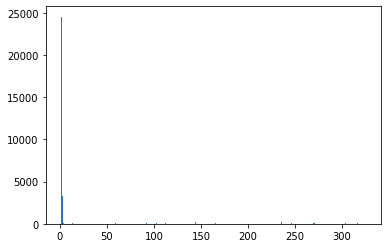

In [21]:
plt.hist(train.data_source, bins=325)
plt.show()

We can observe that 78% of the dataset corresponds to one unique data source.

Although this feature (`data source`) is interesting to explore how the data was obtained, it contains a large number of null values (NA) and is not essential to the main goal of this project (**to predict `tm`**).
So, it was decided to drop this column from the dataset (presented further ahead).

#### Swap pH e tm (to correct data)

Here it is possible to verify that the `pH` variable has errors in the "train" dataset since its maximum is 64.9 (a value impossible to obtain). According to the source of the data, the variable pH and tm have some examples with the values changed. Thus, it is necessary to change these values in the identified sequences (dataset "train_updates").

Here it is possible to verify that the `pH` variable has errors in the `train` dataset, since its maximum is 64.9 (impossible pH value to obtain). According to the [source of the competition](https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/discussion/356251), the variable `pH` and `tm` has some samples with the values swapped. Thus, it is necessary to change these values in the identified sequences (dataset `train_updates`).

In [22]:
update_train = pd.read_csv("train_updates_20220929.csv",index_col="seq_id")
train = swap_ph_tm(train,update_train)

In [23]:
print(f"Labels: {[labels for labels in train.columns]}")
print(f"Labels: {[labels for labels in validation.columns]}")

Labels: ['protein_sequence', 'pH', 'data_source', 'tm']
Labels: ['protein_sequence', 'pH', 'data_source']


#### Drop NA Values

As said above, the column `data_source` will be eliminated from the dataset, as well as the rest of the samples with null values.

In [24]:
print("Remove data_source")
train = train.drop(columns="data_source")
validation = validation.drop(columns="data_source")
print(f"Train data is divided in {train.shape[0]} lines and {train.shape[1]} col")
print(f"Validation data is divided in {validation.shape[0]} lines and {validation.shape[1]} col")
print("We want to predict tm values for test data")

Remove data_source
Train data is divided in 28981 lines and 3 col
Validation data is divided in 2413 lines and 2 col
We want to predict tm values for test data


In [25]:
print(train.isnull().sum().sort_values(ascending=False))
print(validation.isnull().sum().sort_values(ascending=False))

pH                  286
protein_sequence      0
tm                    0
dtype: int64
protein_sequence    0
pH                  0
dtype: int64


In [26]:
missing_data = train[train["pH"].isnull()]
# missing_data

In [27]:
train= train.drop((missing_data).index).reset_index(drop=True)
train

,protein_sequence,pH,tm
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5
...,...,...,...
28690,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8
28691,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2
28692,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6
28693,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7


In [28]:
print(train.isnull().sum().sort_values(ascending=False))
print(validation.isnull().sum().sort_values(ascending=False))

protein_sequence    0
pH                  0
tm                  0
dtype: int64
protein_sequence    0
pH                  0
dtype: int64


#### Summary

In [29]:
# Tamanho das sequencias de proteina e distribuição
lista = [len(train['protein_sequence'].iat[i]) for i in range(len(train))]
pd.Series(lista).describe()

count    28695.000000
mean       451.729535
std        416.889872
min          5.000000
25%        210.000000
50%        352.000000
75%        537.000000
max       8798.000000
dtype: float64

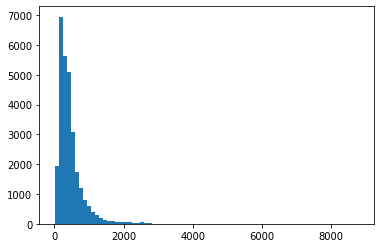

In [30]:
plt.hist(lista, bins=75)
plt.show()

#adicionar titulos aos eixos e grafico

In [71]:
print(pd.Series(train.protein_sequence).describe())

count                                                 28695
unique                                                27141
top       MRNTGAGPSPSVSRPPPSAAPLSGAALAAPGDAPSALYAPSALVLT...
freq                                                     13
Name: protein_sequence, dtype: object


In [31]:
train.describe()

,pH,tm
count,28695.000000,28695.000000
mean,6.872467,51.385604
std,0.793184,12.076609
min,1.990000,25.100000
25%,7.000000,43.700000
50%,7.000000,48.800000
75%,7.000000,54.600000
max,11.000000,130.000000


In [32]:
print(f"Train data is divided in {train.shape[0]} samples and {train.shape[1]} features")
print(f"Labels for train: {[labels for labels in train.columns]}")

Train data is divided in 28695 samples and 3 features
Labels for train: ['protein_sequence', 'pH', 'tm']


Now, other observations can be made:

- the `train` dataset without null values has a total of 28695 samples and only 3 features: `protein_sequence`, `pH` and `tm`.
- the `pH` feature has values between 1.9 and 11 but, the majority of samples have a pH value of 7.
- the `tm` feature has values between 25 and 130, but 50% of samples have a smaller range: 44-55.
- the `protein_sequence` samples have a large range of lenghts (between 5 and 8798), but 50% of samples have lenghts between 210 and 537). The mean lenght of the 28695 sequences is 451.
- to use some machine learning techniques it is needed to transform the feature `protein_sequence` into descriptors (multiple features).

<a class="anchor" id="section2_4"></a>

### 2.4 Protein Descriptors

As we only have two features to work with in the ML step, and one of them is the protein sequence, we need to extract from these sequences a set of descriptors.

Protein descriptors are quantitative measures that characterize various properties of a protein, such as its structure, stability, or function.

Here is a set of examples for these descriptors:

*   Sequence lenght (1 feature)
*   Amonoacid composition (20 features)
*   dipeptide composition (400 features)
*   tripeptide composition (8000 features)
*   Molecular weight (1 feature)
*   Aromaticity (1 feature)
*   Instability index ( 1 feature)
*   Isoeletric point (1 feature)



The only useful variable for this stage is the `protein_sequence`.
With this data, functions based on the `propy` and `biopython` packages were used:
- `calculate_dipeptide_composition`: DPC - dipeptide composition descriptors (400) for each protein. [propy package](https://pypi.org/project/propy3/)
- `calculate_molecular_weight`: Calculate MW from Protein sequence. [Biopython](https://biopython.org/docs/1.76/api/Bio.SeqUtils.ProtParam.html)
- `calculate_isoelectric_point`: Uses the module IsoelectricPoint to calculate the pI of a protein. [Biopython](https://biopython.org/docs/1.76/api/Bio.SeqUtils.ProtParam.html)
- `calculate_aromaticity`: Calculates the aromaticity value of a protein according to Lobry, 1994. It is simply the relative frequency of Phe+Trp+Tyr. [Biopython](https://biopython.org/docs/1.76/api/Bio.SeqUtils.ProtParam.html)
- `calculate_instability_index`: Implementation of the method of Guruprasad et al. 1990 to test a protein for stability. Any value above 40 means the protein is unstable. [Biopython](https://biopython.org/docs/1.76/api/Bio.SeqUtils.ProtParam.html)



In [33]:
train_array = np.array(train.loc[:,["protein_sequence"]])

In [34]:
# Calculate dipeptide
di_peptide = calculate_dipeptide_composition(train_array)
di_dataframe= pd.DataFrame(di_peptide)
#Calulate molecular_weight
molecular_weight = calculate_molecular_weight(train_array)
#Calulate isoelectric_point
isoelectric_point = calculate_isoelectric_point(train_array)
#Calulate aromaticity
aromaticity = calculate_aromaticity(train_array)
#Calulate instability_index
instability_index = calculate_instability_index(train_array)

In [35]:
#Add all new features
train["molecular_weight"]=molecular_weight
train["isoelectric_point"]=isoelectric_point
train["aromaticity"]=aromaticity
train["instability_index"]=instability_index

In [ ]:
# from propy import PyPro

# def calculate_tri(train_array: pd.DataFrame) -> np.ndarray:
#     """CalculatesTripeptideComposition for len(tran_array["protein_sequence"])
#     Args:
#         train_array (pd.DataFrame): _description_

#     Returns:
#         np.ndarray: _description_
#     """
    
#     final = []
#     for i in train_array:
#         protein = "".join(i)
#         result = PyPro.GetSpectrumDict(protein)
#         final.append(result)

#     return final


In [ ]:
#tripeptide= calculate_tri(train_array)

In [36]:
train_dataset = train.join(di_dataframe)
train_dataset.sample()

,protein_sequence,pH,tm,molecular_weight,isoelectric_point,aromaticity,instability_index,AA,AR,AN,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
1746,GLTLGKSTDYRDTYDASLLQGVPRSLNRDPLGLKADNLPFHGTDIW...,7.0,54.0,31284.6895,5.641804,0.103704,22.241111,0.0,0.37,0.0,...,0.0,0.0,0.0,0.0,0.74,0.74,0.0,0.0,0.37,0.37


In [37]:
train_y= train["tm"]
train_y

0        75.7
1        50.5
2        40.5
3        47.2
4        49.5
         ... 
28690    51.8
28691    37.2
28692    64.6
28693    50.7
28694    37.6
Name: tm, Length: 28695, dtype: float64

In [38]:
train_dataset

,protein_sequence,pH,tm,molecular_weight,isoelectric_point,aromaticity,instability_index,AA,AR,AN,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,75.7,36320.7244,6.109589,0.058651,28.389736,2.35,0.88,0.29,...,0.88,0.29,0.00,0.29,0.59,0.29,1.18,0.00,0.29,1.76
1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,50.5,32837.9931,5.144349,0.041958,65.108392,0.70,0.70,0.35,...,0.35,0.00,0.00,0.00,0.00,0.70,0.00,0.00,0.00,0.70
2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,40.5,53428.8034,9.032101,0.080483,35.089336,1.21,0.20,0.40,...,0.40,0.20,0.40,0.00,0.60,0.40,0.40,0.00,0.20,0.20
3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,47.2,29475.5996,4.683840,0.071698,50.502264,0.38,0.38,0.00,...,0.38,0.38,0.00,0.00,0.38,0.38,0.76,0.00,0.00,0.38
4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,49.5,158761.9814,5.917928,0.065472,45.668808,0.28,0.14,0.34,...,0.34,0.48,0.21,0.28,0.62,0.55,0.83,0.00,0.14,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28690,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,51.8,61997.6230,8.466327,0.089253,48.604026,0.73,0.73,0.00,...,0.55,0.18,0.18,0.55,0.55,0.36,0.00,0.55,0.18,0.91
28691,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,37.2,52637.6897,6.532244,0.087420,35.285096,1.07,0.21,0.85,...,0.64,0.43,0.21,0.21,0.21,0.43,0.00,0.00,0.21,0.85
28692,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,64.6,14203.9225,5.271214,0.117188,44.198437,0.79,0.00,1.57,...,0.79,0.79,0.00,0.00,0.79,0.00,0.79,0.00,0.00,0.79
28693,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,50.7,64367.8724,5.688128,0.074199,36.618398,1.01,0.68,0.00,...,1.01,0.34,0.34,0.51,0.17,0.84,0.34,0.00,0.17,1.01


Conclusao 

<a class="anchor" id="section2_5"></a>

### 2.5 Embedding

An embedding is a relativly low dimensional space into which can be translated into a high-dimensional 
vectors. This type of preprocessing make it easier to do machine learning on large inputs like sparse vectors representing protein sequences.

#### SGT Embedding

https://github.com/cran2367/sgt.git

this type of embedding embeds long patterns, thin this case long protein patterns, into a finite dimension vector. The main advantage of SGT is that the long and short term patterns embedded in SGT can be tuned without any increase in the computation.


kappa -->         Tuning parameter, kappa > 0, to change the extraction of 
                    long-term dependency. Higher the value the lesser
                    the long-term dependency captured in the embedding.
                    Typical values for kappa are 1, 5, 10.
                    
lengthsensitive -->  Default false. This is set to true if the embedding of
                    should have the information of the length of the sequence.
                    If set to false then the embedding of two sequences with
                    similar pattern but different lengths will be the same.
                    lengthsensitive = false is similar to length-normalization.


In [ ]:
#Get protein sequence with seq_id 
corpus= train.copy()
corpus['protein_sequence'] = corpus['protein_sequence'].map(list)
ids= np.array([i for i in range(len(corpus['protein_sequence']))])
corpus=corpus[['protein_sequence']]
corpus.insert(0, 'ids', ids)
corpus.columns = ['id', 'sequence']
corpus.sample(1)

,id,sequence
seq_id,,
22237,20120,"[M, R, P, H, R, A, F, S, P, G, L, T, G, V, L, ..."


In [ ]:
sgt = SGT(kappa=1, 
           lengthsensitive=False, 
           mode='multiprocessing')
embeddings = sgt.fit_transform(corpus)
embeddings.sample()

embeddings['id'] = embeddings['id'].astype('int32')
embeddings.sample()

INFO: Pandarallel will run on 1 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


,id,"(A, A)","(A, C)","(A, D)","(A, E)","(A, F)","(A, G)","(A, H)","(A, I)","(A, K)",...,"(Y, M)","(Y, N)","(Y, P)","(Y, Q)","(Y, R)","(Y, S)","(Y, T)","(Y, V)","(Y, W)","(Y, Y)"
seq_id,,,,,,,,,,,,,,,,,,,,,
7765,7491,0.000214,0.002607,0.002735,0.00325,0.003435,0.002003,0.000308,0.002719,0.002741,...,0.000009,0.00039,0.003867,2.933070e-07,0.000143,0.000006,0.000257,0.001749,1.900573e-11,1.053209e-21


In [ ]:
train_dataset_embedding = train.join(embeddings)

<a class="anchor" id="section2_6"></a>

### 2.6 Preprocessing

Here, the `protein_sequence` column has been deleted, since it is a qualitative variable and cannot be used for data preprocessing. The `tm` column was also removed because it is the target variable that we want to predict in the following analysis.

To make the data internally consistent, it was standardized with the scale function of the sklearn package.

After standardizing the data, the dataset was divided into:
- train, with 70% of the samples
- test, with 30% of the samples

For this division, a permutation of the data was performed so that the data have a similar representation in the training and test dataset.

In [39]:
train_dataset= train_dataset.drop(columns= ["protein_sequence","tm"])

In [44]:
# train_dataset_embedding= train_dataset_embedding.drop(columns=["protein_sequence"])

In [45]:
train_dataset

,pH,molecular_weight,isoelectric_point,aromaticity,instability_index,AA,AR,AN,AD,AC,...,VL,VK,VM,VF,VP,VS,VT,VW,VY,VV
0,7.0,36320.7244,6.109589,0.058651,28.389736,2.35,0.88,0.29,0.29,0.00,...,0.88,0.29,0.00,0.29,0.59,0.29,1.18,0.00,0.29,1.76
1,7.0,32837.9931,5.144349,0.041958,65.108392,0.70,0.70,0.35,0.35,0.00,...,0.35,0.00,0.00,0.00,0.00,0.70,0.00,0.00,0.00,0.70
2,7.0,53428.8034,9.032101,0.080483,35.089336,1.21,0.20,0.40,0.60,0.00,...,0.40,0.20,0.40,0.00,0.60,0.40,0.40,0.00,0.20,0.20
3,7.0,29475.5996,4.683840,0.071698,50.502264,0.38,0.38,0.00,0.76,0.38,...,0.38,0.38,0.00,0.00,0.38,0.38,0.76,0.00,0.00,0.38
4,7.0,158761.9814,5.917928,0.065472,45.668808,0.28,0.14,0.34,0.28,0.07,...,0.34,0.48,0.21,0.28,0.62,0.55,0.83,0.00,0.14,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28690,7.0,61997.6230,8.466327,0.089253,48.604026,0.73,0.73,0.00,0.55,0.00,...,0.55,0.18,0.18,0.55,0.55,0.36,0.00,0.55,0.18,0.91
28691,7.0,52637.6897,6.532244,0.087420,35.285096,1.07,0.21,0.85,0.64,0.00,...,0.64,0.43,0.21,0.21,0.21,0.43,0.00,0.00,0.21,0.85
28692,7.0,14203.9225,5.271214,0.117188,44.198437,0.79,0.00,1.57,0.00,0.00,...,0.79,0.79,0.00,0.00,0.79,0.00,0.79,0.00,0.00,0.79
28693,7.0,64367.8724,5.688128,0.074199,36.618398,1.01,0.68,0.00,0.34,0.00,...,1.01,0.34,0.34,0.51,0.17,0.84,0.34,0.00,0.17,1.01


In [46]:
pre_processed_data = preprocessing.scale(train_dataset)

print("Media global: ", pre_processed_data.mean())
print("Desvio padrao global: ", pre_processed_data.std())
print("\nVerificar se a média e o desvio padrão estão próximos dos valores 0 e 1, respetivamente.")
print("\tMédia:", ((pre_processed_data.mean(axis=0) < 0.000001) & (pre_processed_data.mean(axis=0) > -0.000001)).all())
print("\tDesvio Padrão:", ((pre_processed_data.std(axis=0) < 1.000001) & (pre_processed_data.std(axis=0) > 0.999999)).all())

Media global:  -4.803197298218468e-18
Desvio padrao global:  1.0000000000000002

Verificar se a média e o desvio padrão estão próximos dos valores 0 e 1, respetivamente.
	Média: True
	Desvio Padrão: True


In [47]:
num_test = int(pre_processed_data.shape[0] * 0.3)

print("Número de exemplos para teste:", num_test)

indices = np.random.permutation(len(train_dataset))

# Get the Input data pre-processed according with the indexes
train_input = pre_processed_data[indices[:-num_test]]
test_input = pre_processed_data[indices[-num_test:]]

# Get the output data according with the indexes
train_output = train_y[indices[:-num_test]]
test_output = train_y[indices[-num_test:]]

Número de exemplos para teste: 8608


In [ ]:
pre_processed_data_embeddings = preprocessing.scale(train_dataset_embedding)

print("Media global: ", pre_processed_data.mean())
print("Desvio padrao global: ", pre_processed_data.std())
print("\nVerificar se a média e o desvio padrão estão próximos dos valores 0 e 1, respetivamente.")
print("\tMédia:", ((pre_processed_data.mean(axis=0) < 0.000001) & (pre_processed_data.mean(axis=0) > -0.000001)).all())
print("\tDesvio Padrão:", ((pre_processed_data.std(axis=0) < 1.000001) & (pre_processed_data.std(axis=0) > 0.999999)).all())


num_test = int(pre_processed_data_embeddings.shape[0] * 0.3)

print("Numero de exemplos para teste: ", num_test)

indices = np.random.permutation(len(train_dataset))

# Get the Input data pre-processed according with the indexes
train_input_embedding = pre_processed_data_embeddings[indices[:-num_test]]
test_input_embedding= pre_processed_data_embeddings[indices[-num_test:]]

# Get the output data according with the indexes
train_output_embedding = train_y[indices[:-num_test]]
test_output_embedding = train_y[indices[-num_test:]]

<a class="anchor" id="chapter3"></a>

## 3. Non-Supervised Analysis

Unsupervised machine learning is a type of ML where we dont give any lables to the model. Instead, the model is only given input data and must find patterns or relationships in the data on its own. 

Some common unsupervised learning techniques include clustering and dimensionality reduction.

<a class="anchor" id="section3_1"></a>

### 3.1 PCA

Principal component analysis (PCA) serves as a dimentionality reduction method, often used to reduce dimensions of a large data sets, by transforming a large set of variables into a smaller one, reducing accuracy, but still contains most of the needed information.

1. Standardize the range of continuous initial variables (Previously done)
2. Compute the covariance matrix to identify correlations
3. Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components
5. Recast the data along the principal components axes


[0.03425529 0.0241659  0.02167429 0.0182564  0.01629711 0.01406468
 0.01279513 0.01261501 0.01177722 0.01106278 0.01045883 0.01013297
 0.00984486 0.00874017 0.00848734]
0.22462797093344164
90.65010272442838


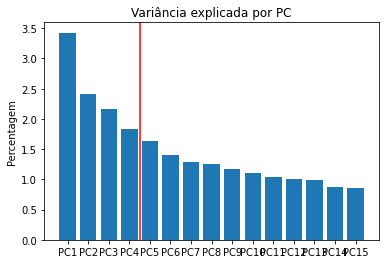

In [48]:
#Select the number of components 
n=15

pca_train= PCA(n_components=n)
pca_train.fit_transform(train_input)

print(pca_train.explained_variance_ratio_)
print(np.sum(pca_train.explained_variance_ratio_))
print(np.sum(pca_train.explained_variance_))

plt.bar(range(n), pca_train.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.axvline(3.5, color='r') # vertical
plt.show()


In [ ]:
# Embeddings
pca_train= PCA(n_components=n)
pca_train.fit_transform(train_input_embedding)

print(pca_train.explained_variance_ratio_)
print(np.sum(pca_train.explained_variance_ratio_))
print(np.sum(pca_train.explained_variance_))

plt.bar(range(n), pca_train.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PC with embeddings")
plt.ylabel("Percentagem")
plt.axvline(3.5, color='r') # vertical
plt.show()

In both cases, PCA doesnt return a significant explained variance. In each case, the explained variance ration is around 22% with the explained variance being higher in the embeddings.

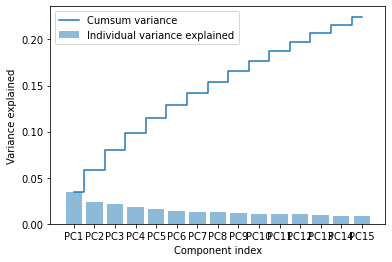

In [49]:
n=15
pca = PCA(n_components=n)
X= pca.fit_transform(train_input)
df_pca = pd.DataFrame(data=X)

features = range(pca.n_components_)
exp_var_pca = pca.explained_variance_ratio_
cumsum = np.cumsum(exp_var_pca)   
explained_variance = pca.explained_variance_


plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual variance explained')
plt.step(range(0,len(cumsum)), cumsum, where='mid',label='Cumsum variance')
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.ylabel("Variance explained")
plt.xlabel("Component index")
plt.legend(loc='best')
plt.show()

We can conclude that PCA is not effective

<a class="anchor" id="section3_2"></a>

### 3.2 Kmeans

K-Means is a unsupervised machine learning algorithm used to group data into clusters based on similarities.
The goal of K-means is to partition a dataset into a specified number of clusters (k) in a way that minimizes the within-cluster sum of squares. Here we present the following steps to run this algotithm:

1. Randomly selecting k initial centroids (points in the dataset that represent the center of the clusters)
2. Data point assigned to the cluster corresponding to the nearest centroid
3. The centroids are then updated to be the mean of the points in their respective clusters

This process is repeated until the centroids no longer change, or a maximum number of iterations is reached (In this case we set a maximum number of iterations)

In [50]:
ph_array=train_input[:, 0]
train_input= train_input[:, 1:]
test_input= test_input[:, 1:]

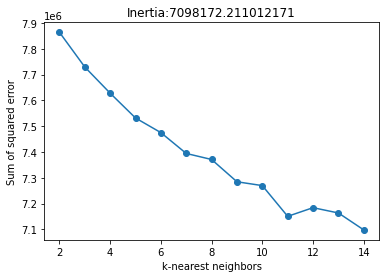

In [51]:
#Without embeding 
k=list(range(2,15))
ssd=[]
for i in k:
    kmeans=KMeans(n_clusters=i).fit(train_input)
    ssd.append(kmeans.inertia_)
    
plt.plot(k, ssd, 'o-')
plt.xlabel('k-nearest neighbors')
plt.ylabel('Sum of squared error')
ii=kmeans.inertia_
plt.title('Inertia:{}'.format(ii))
plt.show()
#inertia is a measure of the sum of squared distances of all the points within a cluster to its centroid.

In [ ]:
#with embeding 

k=list(range(2,15))
ssd=[]
for i in k:
    kmeans=KMeans(n_clusters=i).fit(train_input_embedding)
    ssd.append(kmeans.inertia_)
    
plt.plot(k, ssd, 'o-')
plt.xlabel('k-nearest neighbors')
plt.ylabel('Sum of squared error')
ii=kmeans.inertia_
plt.title('Inertia:{}'.format(ii))
plt.show()

In [52]:
#Lets try this
kmeans_train= KMeans(n_clusters=15,max_iter=1000).fit(train_input)
kmeans_result=kmeans_train.predict(test_input)
inertia=kmeans_train.inertia_
#Give a variable to the centroids and labels 
centroids= kmeans_train.cluster_centers_
labels= kmeans_train.labels_



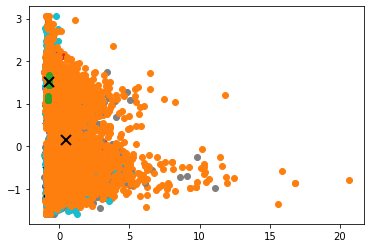

In [58]:
for i in range(len(k)):
    # select only data observations with cluster label == i
    ds = train_input[np.where(labels==i)]
    # plot the data observations (only 2 first colums)
    plt.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = plt.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    plt.setp(lines,ms=10.0)    # x size 
    plt.setp(lines,mew=2.0)    #grossura da linha
plt.show()

As we can see, the graph shows in the top a high inertia, meaning a high sum of squared distances.
The quality of this clusters are low

### t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) is used to project high-dimensional data into a lower-dimensional space, typically 2 or 3 dimensions.The goal is to preserve the pairwise distances between the data points in the lower-dimensional space as much as possible.




1. Compute pairwise affinities between all data points in the high-dimensional space.
2. Use these affinities to construct a probability distribution over the data points in the high-dimensional space.
3. Embed the data points in the low-dimensional space by minimizing the divergence between the two probability distributions (i.e., the one in the high-dimensional space and the one in the low-dimensional space).
4. Repeat steps 1-3 for a number of iterations until the embedding has stabilized.

In [59]:
tsne = TSNE(n_components=2, n_iter=1000,perplexity=40)
points = tsne.fit_transform(train_input)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


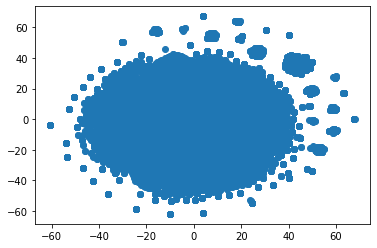

In [60]:
plt.scatter(points[:,0],points[:,1])


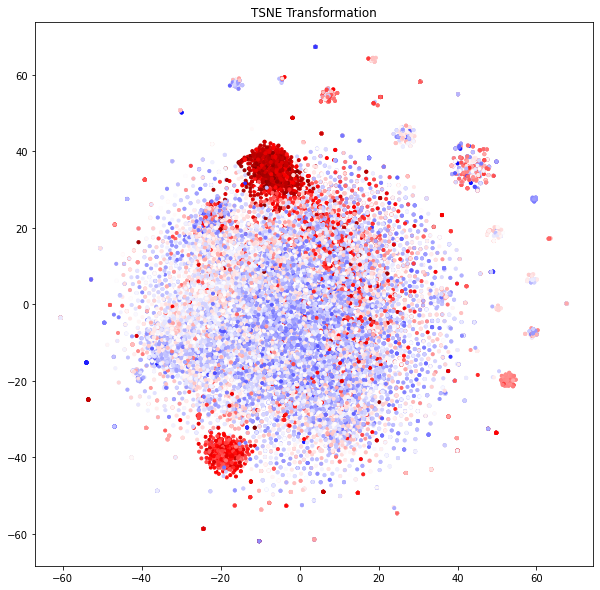

<Figure size 432x288 with 0 Axes>

In [61]:
plt.figure(figsize=(10,10))
norm = Normalize(vmin=0, vmax=100)
plt.scatter(points[:,0], points[:,1], c=train_output, cmap=cm.get_cmap('seismic'), marker='.', norm=norm)
plt.title('TSNE Transformation')
plt.show()
plt.savefig('creature.png')

Here we can see clusters with colors related to the thermostability of the proteins, the red ones are the ones with the highest stability index.

<a class="anchor" id="chapter4"></a>

## 4. Supervised Machine Learning

Supervised Machine Learning has the distinct characteristic of being trained on a labeled dataset. Hereon, the same training dataset of the unsupervised ML will be used with the correct output labeled.

<a class="anchor" id="section4_1"></a>

### 4.1 Regression Analysis

The algorithm, through the recognition of patterns in the training data, will provide predictions in new unseen data. 

SupervisedModelOptimization class was built under the utils/models.py file and uses several useful Supervised Machine Learning models in regression problems, which represents our current task. This class allows the fit of predefined models with tuning of the possible important hyper-parameters variations, by fit_model() method. Finally, a prediction with the tuned and fitted model may be proceeded with the predict() method (check class documentation for further details).[link text](https://)

Pre-processing and verification of the mean and standard deviation of the train dataset:

In [ ]:
data_input = train_dataset.loc[:, ~train_dataset.columns.isin(["protein_sequence", "tm"])].values
data_output = train_dataset.loc[:, "tm"].values

data_input = preprocessing.scale(data_input)

print("Media global: ", data_input.mean())
print("Desvio padrao global: ", data_input.std())
print("\nVerificar se a média e o desvio padrão estão próximos dos valores 0 e 1, respetivamente.")
print("\tMédia:", ((data_input.mean(axis=0) < 0.000001) & (data_input.mean(axis=0) > -0.000001)).all())
print("\tDesvio Padrão:", ((data_input.std(axis=0) < 1.000001) & (data_input.std(axis=0) > 0.999999)).all())

In [ ]:
# Current possible models
# SVM Removed due to the time taking to run
#models = ["Linear Regression", "KNN", "Bagging", "SVM",  "Decision Tree", "Random Forest"]
models = ["Linear Regression", "KNN", "Bagging",  "Random Forest", "Decision Tree"]

# Class instance
smo = SupervisedModelOptimization(data_input, data_output)
smo.summary()

Herewith, the class SupervisedModelOptimization splits the data automatically by a 0.3 proportion if no assigned test data. Accordingly, we have 20086 training samples and 8609 testing samples. 

In [ ]:
model_scores = {}

for model in models:
  print(f"Running {model} prediction...")
  # Fit the model
  smo.fit_model(method=model, cross_val=2)
  
  # Get the predictions
  predictions = smo.predict()
  
  # Get the score
  score = smo.score()
  
  smo.summary()
  
  # Store in the global variable
  model_scores[model] = (predictions, score)

In [ ]:
for model, values in model_scores.items():
  predictions, score = values
  print(f"{model} obtained the following Mean Squared Error:\n\t{score}\n")

We verify that the Mean Squared Error (MSE) remained between 80 and 90 except for the Decision Tree Regressor, resulting in a 113 value error. 

Herewith, Supervised Machine Learning demonstrated better results than Unsupervised, but far from desired. Random Forest is the best model due to having the lowest MSE (80.298), using the following parameters:  
    
    {n_estimators: 20, max_depth: 20, criterion: squared_error}.

It corresponds to the maximum number of estimators and depth attributed. Therefore, model improvement may occur with increased values in these parameters. However, the processing time increases immensely with the increased parameter values.

A possible way for better results may be increasing the cross-validation value, which remained at a value of 2, to reduce the processing model time.

Despite several attempts to run the Support Vector Regression model, it eventually got removed from the equation owing to running endlessly.

### 4.2. Binary Analysis

In this section, we will predict the stability of a protein sequence. Protein sequences are stable if the Tm of a protein sequence is above 65◦C (Tm > 65◦C). Thus, a binary prediction through Logistic Regression will inform us of the relevant stable protein sequences.
Article mentioning this value: https://doi.org/10.1016/j.compbiolchem.2009.10.002

In [ ]:
data_input

array([[ 0.16078851, -0.30259299, -0.38866605, ..., -0.41899083,
         0.26036277,  3.05330905],
       [ 0.16078851, -0.37740901, -0.95272322, ..., -0.41899083,
        -0.74319537,  0.6127002 ],
       [ 0.16078851,  0.06492272,  1.31916243, ..., -0.41899083,
        -0.05108631, -0.53853038],
       ...,
       [ 0.16078851, -0.77770607, -0.87858734, ..., -0.41899083,
        -0.74319537,  0.81992171],
       [ 0.16078851,  0.29991577, -0.63495529, ..., -0.41899083,
        -0.15490267,  1.32646317],
       [ 0.16078851,  0.25490064,  0.21338908, ...,  0.73706128,
         0.5372064 ,  0.29035564]])

In [ ]:
data_output

array([75.7, 50.5, 40.5, ..., 64.6, 50.7, 37.6])

In [2]:
# Train and test data division
train_input, test_input, train_output, test_output = train_test_split(data_input, data_output, test_size=0.3, random_state=42)

In [ ]:
print("Train data:")
print(train_input)
print(train_output)
print("Test data:")
print(test_input)
print(test_output)

Train data:
[[ 0.16078851 -0.16972575 -0.756954   ... -0.41899083  0.15654641
   0.2212818 ]
 [ 0.16078851  1.95356433  0.7044457  ... -0.41899083 -0.22411357
  -0.99902262]
 [ 0.16078851 -0.85565244 -1.30825661 ... -0.41899083 -0.74319537
   1.41856161]
 ...
 [ 0.16078851 -0.18314266  1.35129784 ...  1.28466491  0.22575732
  -0.99902262]
 [ 0.16078851  0.00914667  0.54716664 ... -0.41899083  0.81405002
   0.54362637]
 [ 0.16078851 -0.62054478  1.83788737 ... -0.41899083  1.09089365
  -0.99902262]]
[47.5 64.9 48.6 ... 51.  40.3 42.7]
Test data:
[[-1.09997477 -0.73008606  1.25952545 ... -0.41899083 -0.74319537
  -0.99902262]
 [ 0.16078851 -0.10740628 -0.6934137  ... -0.41899083  0.12194096
  -0.99902262]
 [ 0.16078851 -0.42753283 -0.39979308 ... -0.41899083  0.50260094
  -0.1701366 ]
 ...
 [ 0.16078851 -0.91282453  1.89142126 ... -0.41899083  4.20538443
  -0.99902262]
 [ 0.16078851  0.96281176 -1.13032384 ...  0.31114734 -0.32792993
  -0.44643194]
 [ 0.16078851  0.97119144  0.82940834 .

In [ ]:
tm_threshold = 65.0

# Define the train output data
binary_train_output = deepcopy(train_output)

mask = binary_train_output >= tm_threshold
binary_train_output[mask] = 1
binary_train_output[~mask] = 0

binary_train_output

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# Define the test output data
binary_test_output = deepcopy(test_output)

mask = binary_test_output >= tm_threshold
binary_test_output[mask] = 1
binary_test_output[~mask] = 0

binary_test_output

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print("Occurrences of each value in train output values:")
unique_train, counts_train = np.unique(binary_train_output, return_counts=True)
print(dict(zip(unique_train, counts_train)))

print()
print("Occurrences of each value in test output values:")
unique_test, counts_test = np.unique(binary_test_output, return_counts=True)
print(dict(zip(unique_test, counts_test)))

Occurrences of each value in train output values:
{0.0: 17487, 1.0: 2599}

Occurrences of each value in test output values:
{0.0: 7566, 1.0: 1043}


In [ ]:
log_reg = LogisticRegression(solver='liblinear', max_iter=100)

# Fit the model
log_reg.fit(train_input, binary_train_output)

# Predict values
y_pred = log_reg.predict(test_input)

print("First 10 Predictions:", y_pred[:10])
print("Accuracy Score:", accuracy_score(binary_test_output, y_pred) * 100)
calculate_model_error(binary_test_output, y_pred)

First 10 Predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Accuracy Score: 93.33255894993611
Maximum Residual Error: 1.000
Mean Absolute Error: 0.258
Mean Square Error: 0.258


We achieved an accuracy score of 93.3% and a Mean Squared Error (MSE) metric value of 0.258. Therefore, we can conclude that our protein stability prediction model has high fidelity for the prediction of whether or not a protein may be considered stable.

<a class="anchor" id="chapter5"></a>

## 5. Deep Learning

In [63]:
def setup_FFNN(units, activation):
    model = Sequential()
    model.add(Dense(units, activation=activation, input_shape=(train_input.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1,activation="linear"))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [64]:
def setup_conv1d(kernel_size, filters, activation):
  model = Sequential()
  model.add(Conv1D(filters, kernel_size=3, 
                   activation='relu', input_shape=(train_input.shape[1], 1)))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.2))
  model.add(BatchNormalization())
  model.add(Conv1D(64, kernel_size=3, activation='relu'))
  model.add(MaxPooling1D(pool_size=2))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(1,activation="linear"))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [65]:
def setup_LSTM(units, dropout,recurrent_dropout):
  model = Sequential()
  model.add(LSTM(units, input_shape=(train_input.shape[1], 1),
                 return_sequences=True, dropout=dropout, recurrent_dropout=recurrent_dropout))
  model.add(Dropout(0.2))
  model.add(LSTM(units))
  model.add(Dense(1,activation="linear"))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [83]:
early_stopping = EarlyStopping(monitor='loss', patience=5)

In [66]:
#Parameter grid

#Conv1d
param_dist_conv = {'kernel_size': [3,5],
              'filters': [32, 64],
              'activation': ['relu', 'tanh']}
    
param_dist_ff = {'units': [32,64,128],
              'activation': ['relu', 'tanh']}

param_dist_LSTM = {'units': [32, 64, 128],
              'dropout': [0.1, 0.2, 0.3],
              'recurrent_dropout': [0.1, 0.2, 0.3]}

In [84]:
regressor_conv1d = KerasRegressor(build_fn=setup_conv1d, verbose=0, epochs=20, callbacks=[early_stopping])
regressor_ff= KerasRegressor(build_fn=setup_FFNN, verbose=0)
regressor_LSTM= KerasRegressor(build_fn=setup_LSTM, verbose=0)

<ipython-input-84-f5f95fceded1>:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor_conv1d = KerasRegressor(build_fn=setup_conv1d, verbose=0, epochs=20, callbacks=[early_stopping])
<ipython-input-84-f5f95fceded1>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor_ff= KerasRegressor(build_fn=setup_FFNN, verbose=0)
<ipython-input-84-f5f95fceded1>:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  regressor_LSTM= KerasRegressor(build_fn=setup_LSTM, verbose=0)


In [85]:
random_search_conv1d = RandomizedSearchCV(regressor_conv1d, param_distributions=param_dist_conv,
                                   n_iter=10, cv=5, verbose=1,
                                   scoring='mean_squared_error',random_state=42)

random_search_ff = RandomizedSearchCV(regressor_ff, param_distributions=param_dist_ff,
                                   n_iter=10, cv=5, verbose=1,
                                   scoring='mean_squared_error',random_state=42)

random_search_LSTM = RandomizedSearchCV(regressor_LSTM, param_distributions=param_dist_LSTM,
                                   n_iter=10, cv=5, verbose=1,
                                   scoring='mean_squared_error',random_state=42)


In [86]:
random_search_conv1d.fit(train_input, train_output)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 8 candidates, totalling 40 fits


RandomizedSearchCV(cv=5,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fad84cbc040>,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'filters': [32, 64],
                                        'kernel_size': [3, 5]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
random_search_ff.fit(train_input, train_output)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits


RandomizedSearchCV(cv=5,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fe772ad8e20>,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'units': [32, 64, 128]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [ ]:
random_search_LSTM.fit(train_input, train_output)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fe771518070>,
                   param_distributions={'dropout': [0.1, 0.2, 0.3],
                                        'recurrent_dropout': [0.1, 0.2, 0.3],
                                        'units': [32, 64, 128]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [87]:
print(random_search_conv1d.best_params_)

# Evaluate the model
y_pred = random_search_conv1d.predict(test_input)
print("mse:", mean_squared_error(test_output, y_pred))

{'kernel_size': 3, 'filters': 32, 'activation': 'relu'}
mse: 81.06398722007951


In [ ]:
print(random_search_ff.best_params_)

# Evaluate the model
y_pred = random_search_ff.predict(test_input)
print("mse:", mean_squared_error(test_output, y_pred))

{'units': 128, 'activation': 'relu'}
R2: 0.08599761057205002


In [ ]:
print(random_search_LSTM.best_params_)

# Evaluate the model
y_pred = random_search_LSTM.predict(test_input)
print("mse:", mean_squared_error(test_output, y_pred))

{'units': 128, 'recurrent_dropout': 0.1, 'dropout': 0.2}
R2: 147.20724674363134


<a class="anchor" id="chapter6"></a>

## 6. Conclusions